## Histogram Equalization
#### cv2.equalizeHist(imgIn)

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('dark_image1.png', 0)  # read image as grayscale

In [3]:
cv2.imshow('Original image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

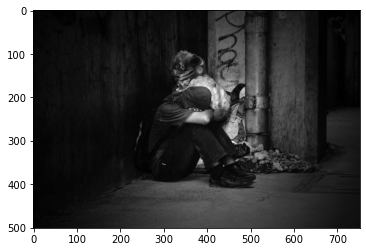

In [17]:
plt.imshow(img, cmap='gray')
plt.show()

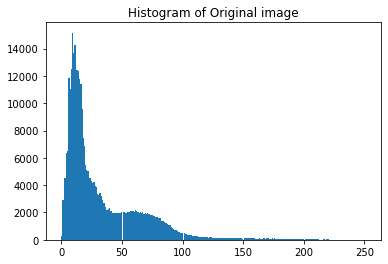

In [5]:
ax = plt.hist(img.ravel(), bins=256)
plt.title("Histogram of Original image")
plt.show()

In [6]:
hist_equal = cv2.equalizeHist(img)  # histogram equalization

In [7]:
cv2.imshow('Histogram equalized image', hist_equal)
cv2.waitKey(0)
cv2.destroyAllWindows()

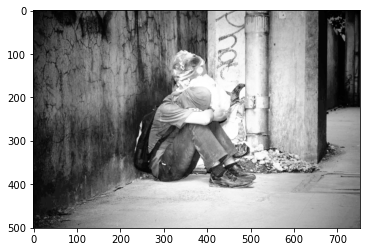

In [19]:
plt.imshow(hist_equal, cmap='gray')
plt.show()

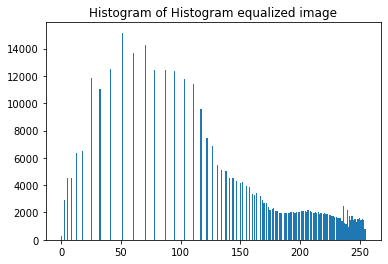

In [8]:
ax = plt.hist(hist_equal.ravel(), bins=256)
plt.title("Histogram of Histogram equalized image")
plt.show()

In [10]:
img_and_hist_equal = np.hstack((img, hist_equal))

In [11]:
cv2.imshow('Comparison', img_and_hist_equal)
cv2.waitKey(0)
cv2.destroyAllWindows()

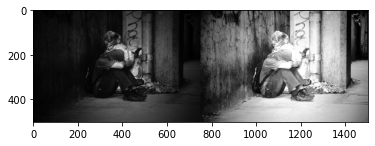

In [20]:
plt.imshow(img_and_hist_equal, cmap='gray')
plt.show()

### Contrast Limited Adaptive Histogram Equalization (CLAHE)
#### cv2.createCLAHE(clip_limit, block_size), clahe.apply(img_in)

In [21]:
img = cv2.imread('dark_image1.png', 0)  # read image as grayscale

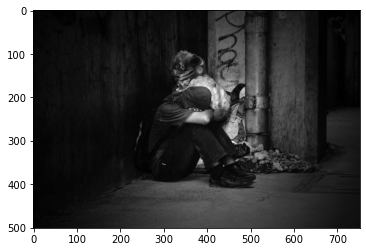

In [22]:
plt.imshow(img, cmap='gray')
plt.show()

In [23]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

In [24]:
out = clahe.apply(img)

In [25]:
cv2.imshow('CLAHE image', out)
cv2.waitKey(0)
cv2.destroyAllWindows()

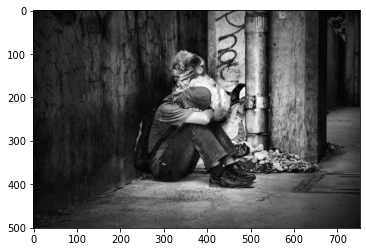

In [26]:
plt.imshow(out, cmap='gray')
plt.show()

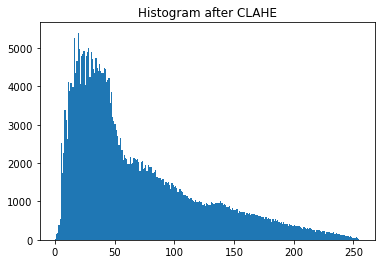

In [27]:
ax = plt.hist(out.ravel(), bins=256)
plt.title("Histogram after CLAHE")
plt.show()

### Enhancing Images Using Histogram Equalization and CLAHE

In [31]:
img2 = cv2.imread('fingervein.bmp', 0)  # load image of finger vein

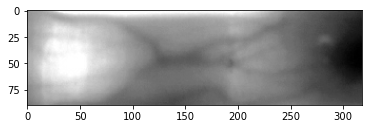

In [29]:
plt.imshow(img2, cmap='gray')
plt.show()

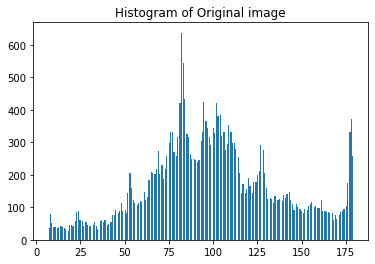

In [30]:
ax = plt.hist(img2.ravel(), bins=256)
plt.title("Histogram of Original image")
plt.show()

In [33]:
hist_equal2 = cv2.equalizeHist(img2)  # histogram equalization

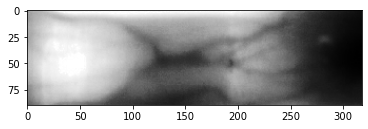

In [34]:
plt.imshow(hist_equal2, cmap='gray')
plt.show()

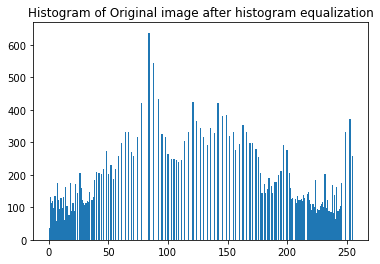

In [36]:
ax = plt.hist(hist_equal2.ravel(), bins=256)
plt.title("Histogram of Original image after histogram equalization")
plt.show()

In [37]:
clahe2 = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))  # apply CLAHE

In [40]:
out2 = clahe2.apply(img2)

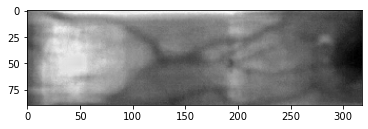

In [41]:
plt.imshow(out2, cmap='gray')
plt.show()

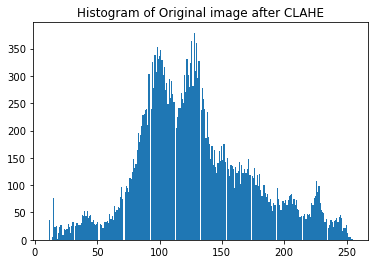

In [43]:
ax = plt.hist(out2.ravel(), bins=256)
plt.title("Histogram of Original image after CLAHE")
plt.show()

## Histogram Equalization - HSV

In [47]:
img3 = cv2.imread('bloom.jpg')

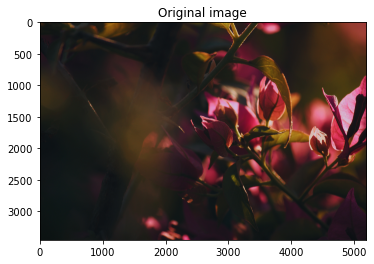

In [48]:
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB);
img3_plot = plt.imshow(img3_rgb)
plt.title('Original image')
plt.show()

In [49]:
img3_hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

In [50]:
h, s, v = cv2.split(img3_hsv)  # split image into 3 hsv channels

In [51]:
v = cv2.equalizeHist(v)  # apply histogram equalization to v channel

In [52]:
hsv = cv2.merge([h,s,v])

In [53]:
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

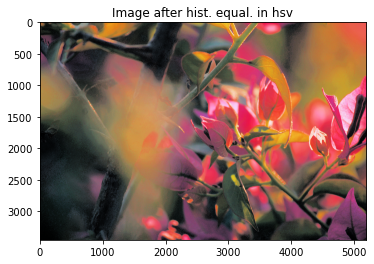

In [54]:
plt.imshow(rgb)
plt.title('Image after hist. equal. in hsv')
plt.show()

#### CLAHE

In [57]:
h2, s2, v2 = cv2.split(img3_hsv)

In [58]:
clahe3 = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))

In [69]:
v2 = clahe3.apply(v2)

In [70]:
hsv2 = cv2.merge([h2,s2,v2])

In [71]:
rgb2 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2RGB)

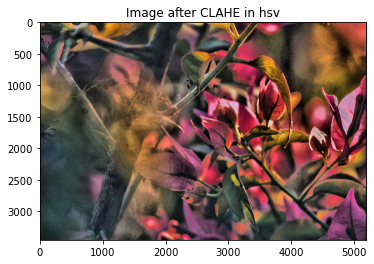

In [72]:
plt.imshow(rgb2)
plt.title('Image after CLAHE in hsv')
plt.show()

## Histogram Equalization - LAB

In [63]:
img3_lab = cv2.cvtColor(img3, cv2.COLOR_BGR2LAB)

In [64]:
img3_lab[:, :, 0] = cv2.equalizeHist(img3_lab[:, :, 0])  # another approach than splitting

In [65]:
rgb3 = cv2.cvtColor(img3_lab, cv2.COLOR_LAB2RGB)

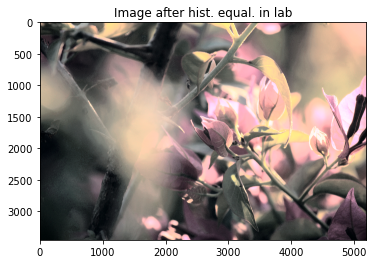

In [66]:
plt.imshow(rgb3)
plt.title('Image after hist. equal. in lab')
plt.show()

#### CLAHE

In [80]:
clahe4 = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))

In [81]:
img4_lab = cv2.cvtColor(img3, cv2.COLOR_BGR2LAB)

In [82]:
img4_lab[:, :, 0] = clahe4.apply(img4_lab[:, :, 0])

In [83]:
rgb4 = cv2.cvtColor(img4_lab, cv2.COLOR_LAB2RGB)

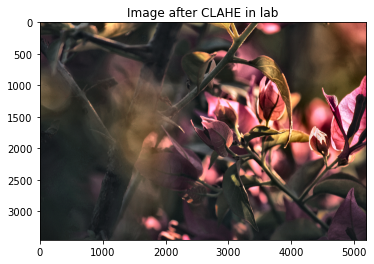

In [84]:
plt.imshow(rgb4)
plt.title('Image after CLAHE in lab')
plt.show()

## Image Enhancement in a User-Defined ROI

In [85]:
ocean = cv2.imread('ocean.jpg')

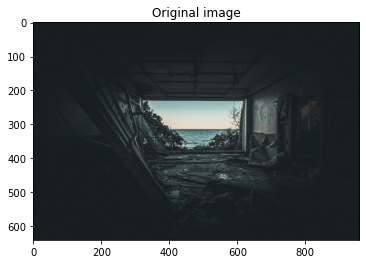

In [96]:
ocean_rgb = cv2.cvtColor(ocean, cv2.COLOR_BGR2RGB)
plt.imshow(ocean_rgb)
plt.title('Original image')
plt.show()

In [91]:
x,y,w,h = cv2.selectROI(ocean, fromCenter=0)  # ROI selector appears

In [92]:
cv2.destroyAllWindows()

In [93]:
mask = np.zeros(ocean.shape[:2], dtype="uint8")  # create array for mask

In [94]:
mask[int(y):int(y+h), int(x):int(x+w)] = 255  # create binary mask for ROI

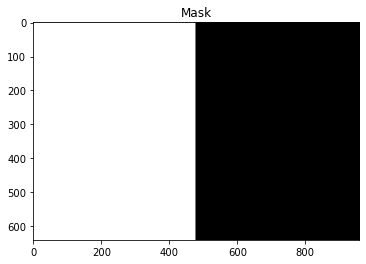

In [97]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask_rgb)
plt.title('Mask')
plt.show()

In [98]:
cv2.imwrite('ocean_mask.png', mask)

True

In [100]:
ocean_hsv = cv2.cvtColor(ocean, cv2.COLOR_BGR2HSV)

In [101]:
ocean_hist = cv2.calcHist([ocean_hsv], [2], mask, [256], [0,255])  # compute histogram of the masked region in channel V

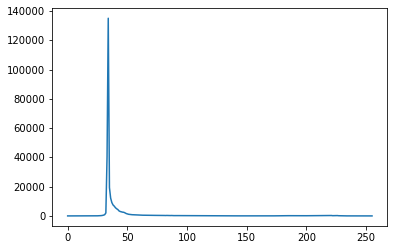

In [102]:
plt.plot(ocean_hist)
plt.show()

In [108]:
ocean_v = ocean_hsv[:,:,2]

In [109]:
ocean_clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8,8))

In [114]:
ocean_v[int(y):int(y+h), int(x):int(x+w)] = ocean_clahe.apply(ocean_v[int(y):int(y+h), int(x):int(x+w)])  # apply CLAHE for ROI region

In [111]:
ocean_hist_ROI = cv2.calcHist([ocean_hsv], [2], mask, [256], [0,255])

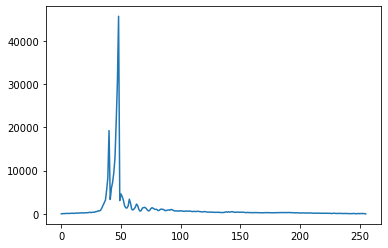

In [112]:
plt.plot(ocean_hist_ROI)
plt.show()

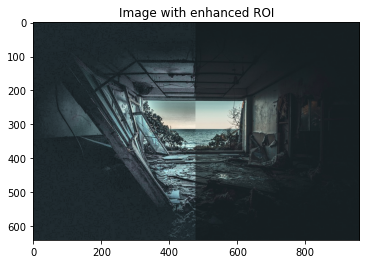

In [113]:
ocean_enhanced = cv2.cvtColor(ocean_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(ocean_enhanced)
plt.title('Image with enhanced ROI')
plt.show()